In [307]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [308]:
housing_data= pd.read_csv(r"C:\Users\Haider\Desktop\Housing.csv")

In [309]:
housing_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [310]:
housing_data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [311]:
housing_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [312]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [313]:
housing_data.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [314]:
housing_data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [315]:
housing_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

In [316]:
housing_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


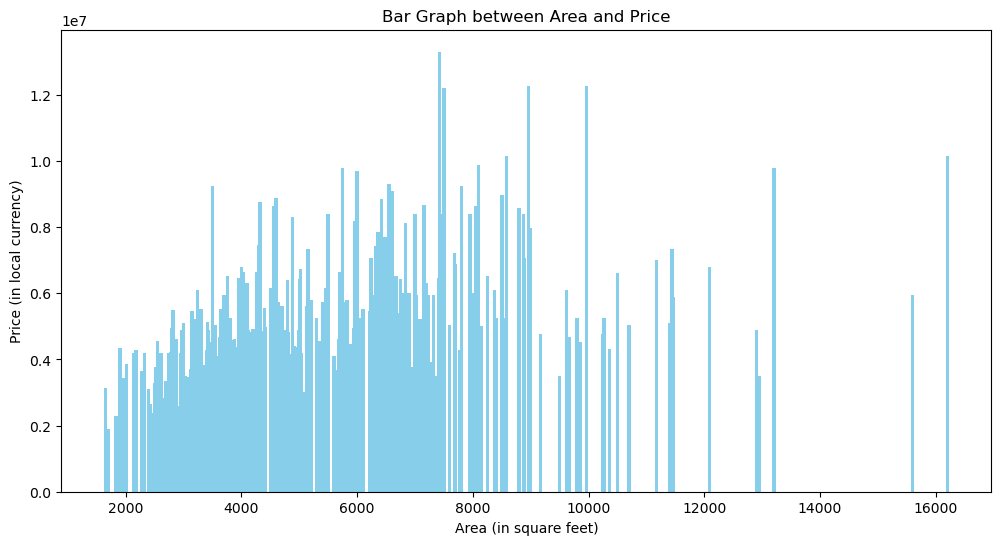

In [317]:
# Plot a bar graph between area and price
plt.figure(figsize=(12, 6))
plt.bar(housing_data['area'], housing_data['price'], color='skyblue', width=60)
plt.xlabel('Area (in square feet)')
plt.ylabel('Price (in local currency)')
plt.title('Bar Graph between Area and Price')
plt.show()

In [318]:
# Count the number of houses with different numbers of stories
stories_counts = housing_data['stories'].value_counts()

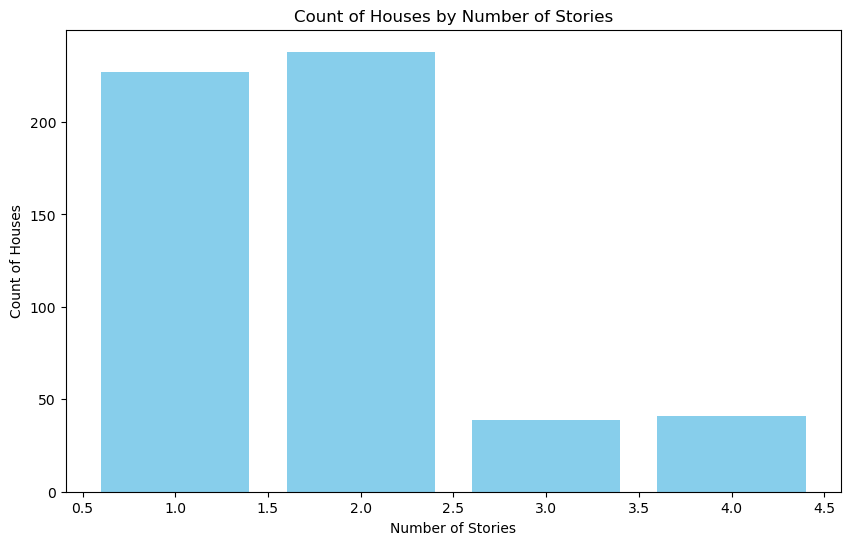

In [319]:
# Plot a bar graph for the number of stories
plt.figure(figsize=(10, 6))
plt.bar(stories_counts.index, stories_counts.values, color='skyblue')
plt.xlabel('Number of Stories')
plt.ylabel('Count of Houses')
plt.title('Count of Houses by Number of Stories')
plt.show()

In [320]:
# Count the number of houses with different numbers of bedrooms
bedrooms_counts = housing_data['bedrooms'].value_counts()

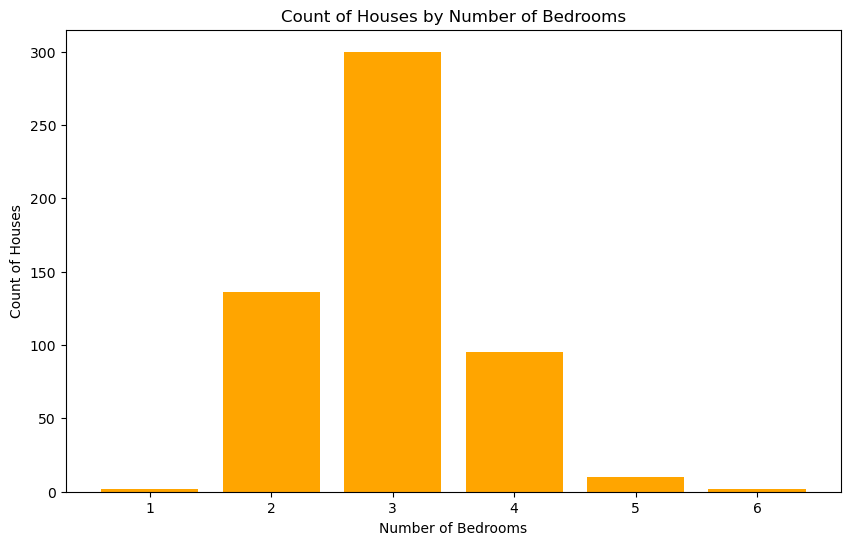

In [321]:
# Plot a bar graph for the number of bedrooms
plt.figure(figsize=(10, 6))
plt.bar(bedrooms_counts.index, bedrooms_counts.values, color='orange')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count of Houses')
plt.title('Count of Houses by Number of Bedrooms')
plt.show()

In [322]:
# Count the number of houses with different numbers of bathrooms
bathrooms_counts = housing_data['bathrooms'].value_counts()

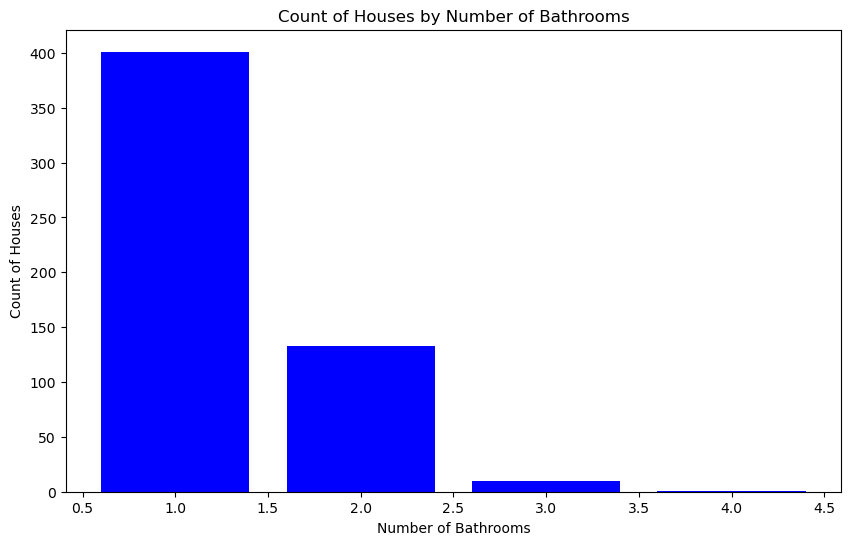

In [323]:
# Plot a bar graph for the number of bathrooms
plt.figure(figsize=(10, 6))
plt.bar(bathrooms_counts.index, bathrooms_counts.values, color='blue')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count of Houses')
plt.title('Count of Houses by Number of Bathrooms')
plt.xticks(rotation=0)
plt.show()

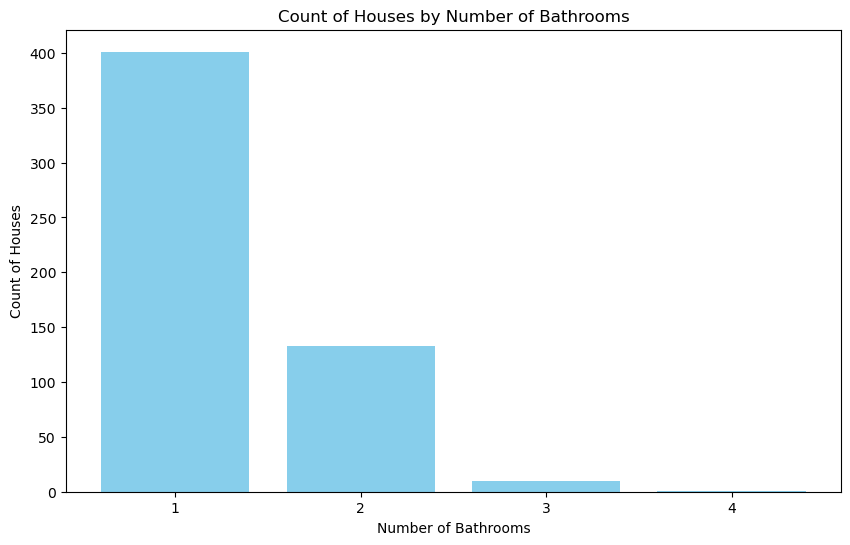

In [324]:
# Plot a bar graph for the number of bathrooms
plt.figure(figsize=(10, 6))
plt.bar(bathrooms_counts.index, bathrooms_counts.values, color='skyblue')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count of Houses')
plt.title('Count of Houses by Number of Bathrooms')
plt.xticks(bathrooms_counts.index)  # Ensure all bathroom counts are shown on the x-axis
plt.show()

In [325]:
# Count the number of houses on the main road and not on the main road
mainroad_counts = housing_data['mainroad'].value_counts()

In [326]:
# Define colors with high values in red
colors = ['skyblue' if value == mainroad_counts.max() else 'blue' for value in mainroad_counts]

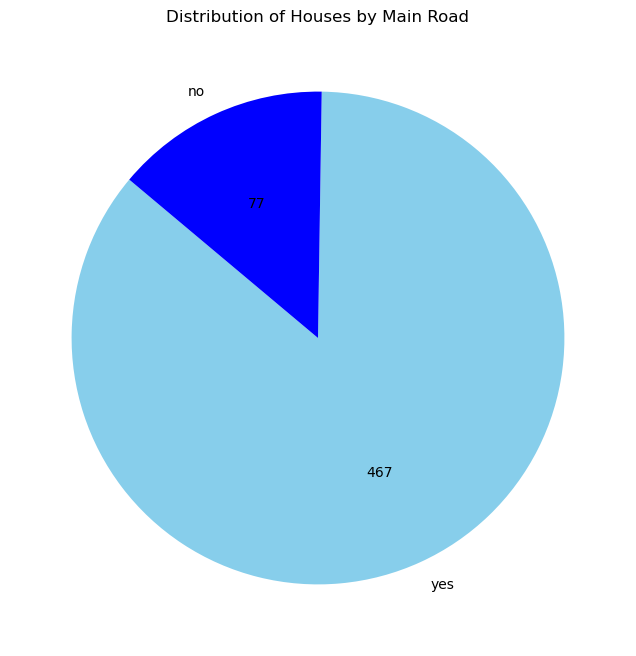

In [327]:
# Plot a pie chart for the number of houses on the main road
plt.figure(figsize=(8, 8))
plt.pie(mainroad_counts, labels=mainroad_counts.index, autopct=lambda p: f'{int(p * sum(mainroad_counts) / 100)}', startangle=140, colors=colors)
plt.title('Distribution of Houses by Main Road')
plt.show()

In [328]:
# Count the number of houses with and without a guestroom
guestroom_counts = housing_data['guestroom'].value_counts()

In [329]:
# Define colors with high values in red
colors = ['blue' if value == guestroom_counts.max() else 'skyblue' for value in guestroom_counts]

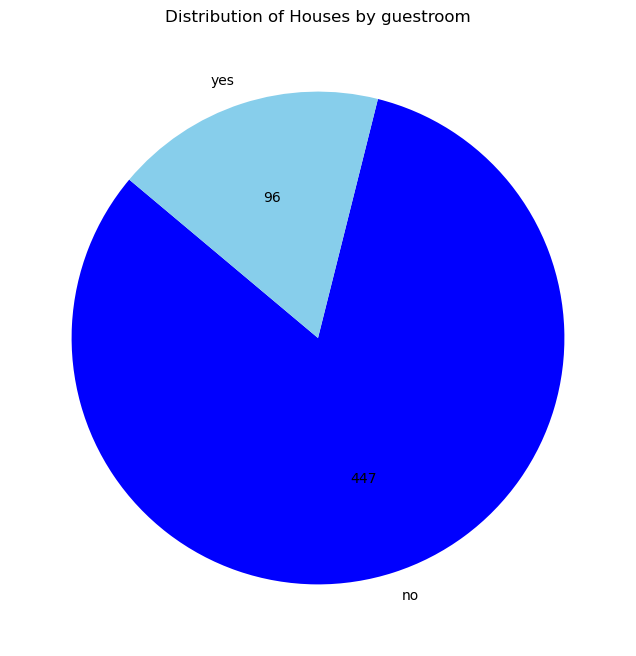

In [330]:
# Plot a pie chart for the number of houses with and without a guestroom
plt.figure(figsize=(8, 8))
plt.pie(guestroom_counts, labels=guestroom_counts.index, autopct=lambda p:f'{int(p * sum(guestroom_counts) / 100)}', startangle=140, colors=colors)
plt.title('Distribution of Houses by guestroom')
plt.show()

In [331]:
# Filter houses that have a guestroom
guestroom_houses = housing_data[housing_data['guestroom'] == 'yes']

In [332]:
# Count the furnishing status of houses with a guestroom
furnishing_counts = guestroom_houses['furnishingstatus'].value_counts()

In [333]:
# Define colors with high values in red
colors = ['darkblue' if value == furnishing_counts.max() else 'skyblue' for value in furnishing_counts]

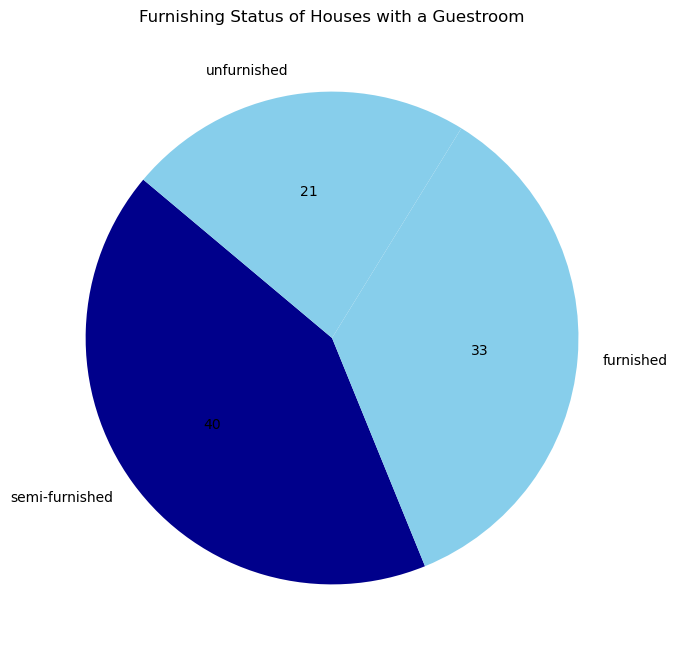

In [334]:
# Plot a pie chart for the furnishing status of houses with a guestroom
plt.figure(figsize=(8, 8))
plt.pie(furnishing_counts, labels=furnishing_counts.index, autopct=lambda p: f'{int(p * sum(furnishing_counts) / 100)}', startangle=140, colors=colors)
plt.title('Furnishing Status of Houses with a Guestroom')
plt.show()

In [335]:
# Example data (replace with your actual dataset)
data = {
    'house_id': [1, 2, 3, 4, 5],
    'bedrooms': [3, 4, 2, 3, 2],
    'bathrooms': [2, 3, 1, 2, 1],
    'stories': [2, 3, 1, 2, 1],
    'mainroad': ['Yes', 'No', 'Yes', 'Yes', 'No']
}

In [336]:
# Create a DataFrame
df = pd.DataFrame(data)

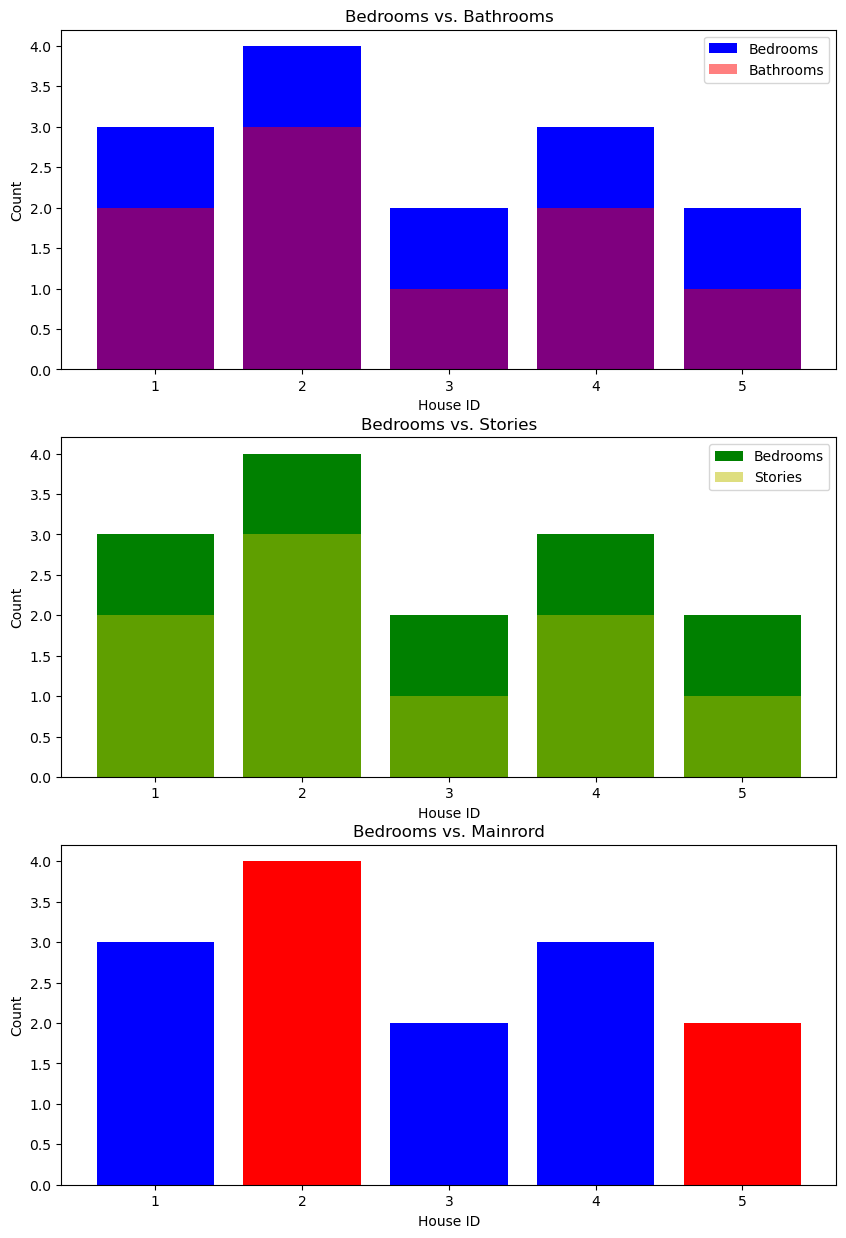

In [337]:
# Plotting setup
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
# Plot 1: Bedrooms vs. Bathrooms
axs[0].bar(df['house_id'], df['bedrooms'], color='b', label='Bedrooms')
axs[0].bar(df['house_id'], df['bathrooms'], color='r', label='Bathrooms', alpha=0.5)
axs[0].set_xlabel('House ID')
axs[0].set_ylabel('Count')
axs[0].set_title('Bedrooms vs. Bathrooms')
axs[0].legend()


# Plot 2: Bedrooms vs. Stories
axs[1].bar(df['house_id'], df['bedrooms'], color='g', label='Bedrooms')
axs[1].bar(df['house_id'], df['stories'], color='y', label='Stories', alpha=0.5)
axs[1].set_xlabel('House ID')
axs[1].set_ylabel('Count')
axs[1].set_title('Bedrooms vs. Stories')
axs[1].legend()

# Plot 3: Bedrooms vs. Mainroad
colors = np.where(df['mainroad'] == 'Yes', 'b', 'r')  # Blue for 'Yes', Red for 'No'
axs[2].bar(df['house_id'], df['bedrooms'], color=colors)
axs[2].set_xlabel('House ID')
axs[2].set_ylabel('Count')
axs[2].set_title('Bedrooms vs. Mainrord')
axs[1].legend()


In [338]:
# Identify the categorical columns
categorical_columns = housing_data.select_dtypes(include=['object']).columns

In [339]:
# Apply label encoding to categorical columns
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    housing_data[column] = label_encoders[column].fit_transform(housing_data[column])

In [340]:
# Display the first few rows of the transformed dataset
print(housing_data.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  


In [341]:
# Display the mappings for the label encoded columns
for column, le in label_encoders.items():
    print(f"\nMapping for column '{column}':")
    print(dict(zip(le.classes_, le.transform(le.classes_))))


Mapping for column 'mainroad':
{'no': 0, 'yes': 1}

Mapping for column 'guestroom':
{'no': 0, 'yes': 1}

Mapping for column 'basement':
{'no': 0, 'yes': 1}

Mapping for column 'hotwaterheating':
{'no': 0, 'yes': 1}

Mapping for column 'airconditioning':
{'no': 0, 'yes': 1}

Mapping for column 'prefarea':
{'no': 0, 'yes': 1}

Mapping for column 'furnishingstatus':
{'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2}


In [342]:
housing_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [343]:
# Identify the categorical columns
categorical_columns = housing_data.select_dtypes(include=['object']).columns

In [344]:
# Apply label encoding to categorical columns
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    housing_data[column] = label_encoders[column].fit_transform(housing_data[column])

In [345]:
# Split the data into features (X) and target (y)
X = housing_data.drop(columns=['area'])
y = housing_data['area']

In [346]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [347]:
# Apply MinMaxScaler to scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [348]:
# Train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [349]:
# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

In [350]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R^2: {train_r2}")
print(f"Testing R^2: {test_r2}")

Training MSE: 3052564.378095106
Testing MSE: 2879292.539047891
Training R^2: 0.37032669959803577
Testing R^2: 0.2998982313935097


In [351]:
# Display the first few predicted values for the test set
print("\nFirst few predicted values for the test set:")
print(y_test_pred[:5])


First few predicted values for the test set:
[3482.01106721 5602.80888327 4885.28727121 6396.64408127 4248.3451739 ]


In [352]:
# Display the first few rows of the scaled training data
print("Scaled Training Data:")
print(train_data_scaled.head())

Scaled Training Data:
       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  0.298969       0.4   0.333333  1.000000       1.0        0.0       0.0   
1  0.381443       0.4   0.333333  0.000000       1.0        0.0       1.0   
2  0.148866       0.2   0.000000  0.000000       1.0        0.0       1.0   
3  0.065979       0.4   0.000000  0.333333       1.0        0.0       1.0   
4  0.144330       0.4   0.000000  0.333333       1.0        0.0       0.0   

   hotwaterheating  airconditioning   parking  prefarea  furnishingstatus  
0              0.0              1.0  0.333333       0.0               0.0  
1              0.0              1.0  1.000000       0.0               0.5  
2              0.0              1.0  0.666667       0.0               0.0  
3              0.0              0.0  0.000000       1.0               1.0  
4              0.0              0.0  0.000000       0.0               1.0  


In [353]:
# Display the first few rows of the scaled testing data
print("\nScaled Testing Data:")
print(test_data_scaled.head())


Scaled Testing Data:
       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  0.292096       0.6   0.333333  0.333333       0.0        0.0       1.0   
1  0.333333       0.4   0.333333  0.666667       1.0        0.0       0.0   
2  0.164261       0.2   0.000000  0.000000       1.0        0.0       0.0   
3  0.230241       0.4   0.000000  0.333333       1.0        0.0       0.0   
4  0.158763       0.4   0.000000  0.000000       1.0        0.0       0.0   

   hotwaterheating  airconditioning   parking  prefarea  furnishingstatus  
0              0.0              0.0  0.333333       0.0               1.0  
1              0.0              1.0  0.000000       1.0               0.0  
2              0.0              0.0  0.000000       0.0               0.5  
3              0.0              1.0  0.000000       0.0               0.5  
4              0.0              0.0  0.000000       0.0               0.0  
